## <b> Moving average model
The moving average models use dependency between residual errors to forecast values in the next time period. The model helps you adjust for any unpredictable events such as catastrophic events leading to a share market crash leading to share prices falling, which will happen over time and is captured as a moving average process.

The qth order AR model is denoted by AR(p):
\begin{align}
x_{t} & = α - ø_{1}∈_{t-1} - ø_{2}∈_{t-2} - ... - ø_{p}∈_{t-p} + ∈_{t}\\
\end{align}

Here, Єt is the identically independently-distributed error at time t and follows normal
distribution N(0, σ2) with zero mean and σ2 variance. The Є component represents error in Єt
time t and the α and Є notations represent mean intercept and error coefficients, respectively.

In [1]:
# Load modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


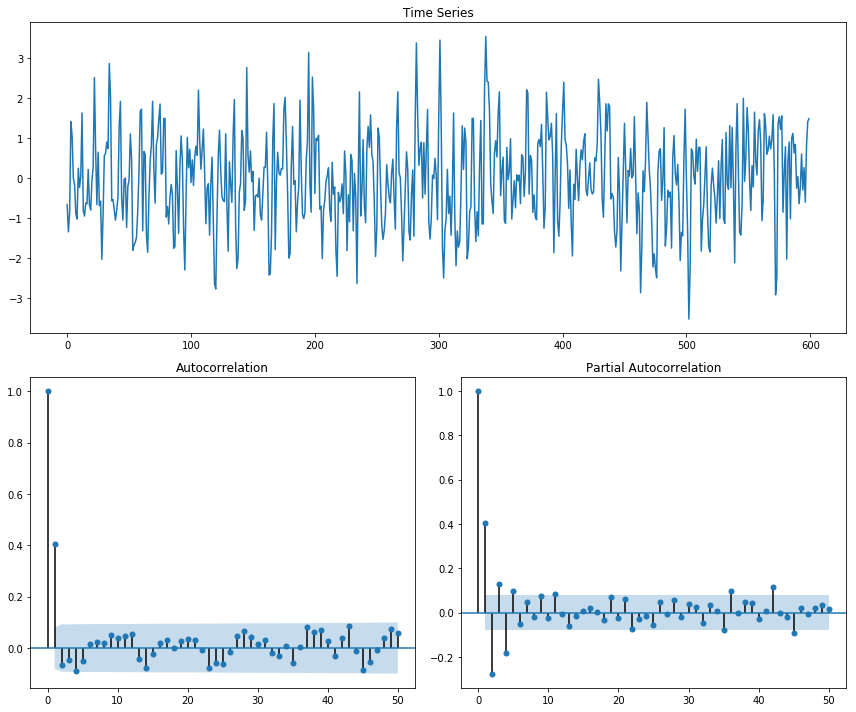

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None
    
        
# Number of samples
n = 600

# Generate MA(1) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

The preceding snippet will generate a time series dataset with an MA(1) dependency with 0.7 serial correlation between the error and can be represented as follows:

\begin{align}
x_{t} & = 0.7∈_{t-1} + ∈_{t}\\
\end{align}

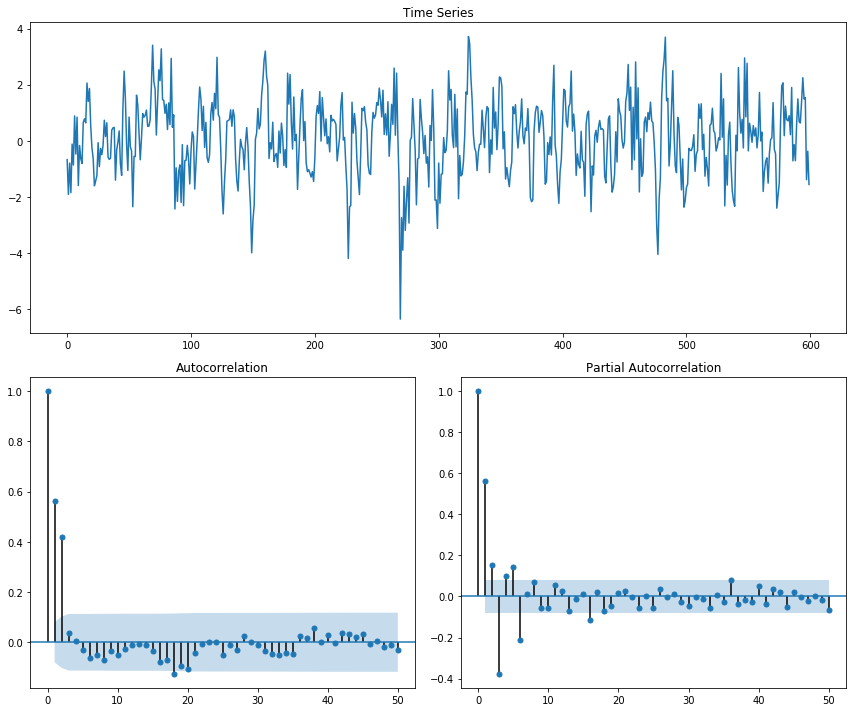

In [3]:
# Generate MA(2) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma2_data)

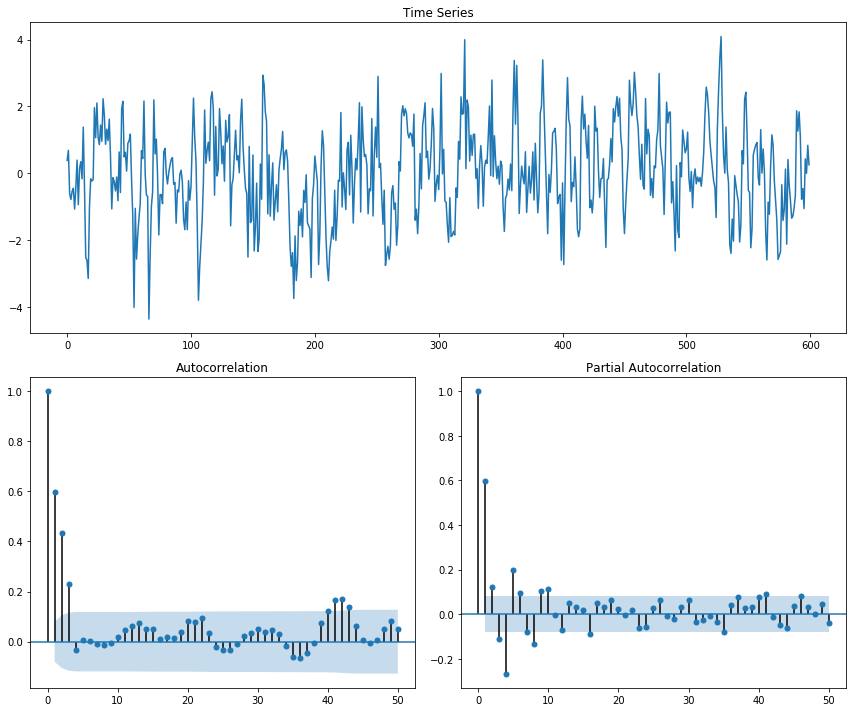

In [4]:
# Generate MA(3) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)

In [5]:
# Build MA(1) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1)).fit(
    maxlag=30, method='mle', trend='nc'
)
ma1.summary()
# The model has captured the 0.67 correlation between residuals, 
# which is quite close to the simulated value of 0.7.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -843.827
Method:                           mle   S.D. of innovations              0.987
Date:                Sat, 02 May 2020   AIC                           1691.654
Time:                        10:57:48   BIC                           1700.448
Sample:                             0   HQIC                          1695.077
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6773      0.035     19.289      0.000       0.609       0.746
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4764           +0.0000j            1.4764            0.5000
-----------------------------------------------------------------------------
"""

In [6]:
# Build MA(3) model
ma3 = smtsa.ARMA(ma3_data.tolist(), order=(0, 3)).fit(
    maxlag=30, method='mle', trend='nc'
)
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -850.973
Method:                           mle   S.D. of innovations              0.998
Date:                Sat, 02 May 2020   AIC                           1709.947
Time:                        10:57:48   BIC                           1727.534
Sample:                             0   HQIC                          1716.793
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5876      0.037     15.717      0.000       0.514       0.661
ma.L2.y        0.6772      0.036     18.665      0.000       0.606       0.748
ma.L3.y        0.5173      0.036     14.210      0.000       0.446       0.589
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0690           -1.1537j            1.1557           -0.2405
MA.2            0.0690           +1.1537j            1.1557            0.2405
MA.3           -1.4473           -0.0000j            1.4473           -0.5000
-----------------------------------------------------------------------------
"""